In [62]:
# Import essential libraries for data manipulation, visualization, clustering, scaling, and dimensionality reduction.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [63]:
# 1. Data Loading Section
final_df = pd.read_csv('/Users/atrabaja/Documents/FinMark_DataMining/Final_Merged_Dataset.csv')
print("Dataset loaded successfully. Shape:", final_df.shape)
print(final_df.head())

Dataset loaded successfully. Shape: (1000, 10)
   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1                10.0     Very satisfied   
1            2                 3.0     Very satisfied   
2            3                10.0     Very satisfied   
3            4                 7.0  Needs improvement   
4            5                 8.0     Unsatisfactory   

   Likelihood_to_Recommend  Customer_Loyalty_Score  Sentiment_Score  \
0                        9                     9.5             0.65   
1                        3                     3.0             0.65   
2                        1                     5.5             0.65   
3                        4                     5.5             0.00   
4                        7                     7.5             0.00   

   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2     

In [64]:
# 2. Feature Selection Section
features = final_df[['Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Frequency', 'Customer_Loyalty_Score', 'Sentiment_Score']]
print("Selected features for clustering:")
print(features.head())

Selected features for clustering:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2                    1538.0                      1538.0   
3                    8295.0                      4147.5   
4                   14798.0                      2959.6   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0                    6.0                     9.5             0.65  
1                    2.0                     3.0             0.65  
2                    1.0                     5.5             0.65  
3                    2.0                     5.5             0.00  
4                    5.0                     7.5             0.00  


In [65]:
# 3. Handling Missing Values Section
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
print("Missing values handled. First 5 rows:")
print(pd.DataFrame(features_imputed, columns=features.columns).head())

Missing values handled. First 5 rows:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2                    1538.0                      1538.0   
3                    8295.0                      4147.5   
4                   14798.0                      2959.6   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0                    6.0                     9.5             0.65  
1                    2.0                     3.0             0.65  
2                    1.0                     5.5             0.65  
3                    2.0                     5.5             0.00  
4                    5.0                     7.5             0.00  


In [66]:
# 4. Data Standardization Section
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)
print("Features standardized. First 5 rows:")
print(pd.DataFrame(scaled_features, columns=features.columns).head())

Features standardized. First 5 rows:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                  0.684789                    0.421872   
1                 -1.197486                   -0.047752   
2                 -1.729080                   -1.267441   
3                 -0.662894                    2.209105   
4                  0.363213                    0.626508   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0               0.448776                1.607950         0.576566  
1              -1.392691               -1.047456         0.576566  
2              -1.853057               -0.026146         0.576566  
3              -1.392691               -0.026146        -1.144526  
4              -0.011590                0.790902        -1.144526  


In [67]:
# 5. Feature Correlation Analysis
correlation_matrix = pd.DataFrame(scaled_features, columns=features.columns).corr()
print("Feature correlation matrix:")
print(correlation_matrix)

Feature correlation matrix:
                            Total_Transaction_Amount  \
Total_Transaction_Amount                    1.000000   
Average_Transaction_Amount                  0.445870   
Transaction_Frequency                       0.858457   
Customer_Loyalty_Score                      0.041039   
Sentiment_Score                            -0.047180   

                            Average_Transaction_Amount  Transaction_Frequency  \
Total_Transaction_Amount                      0.445870               0.858457   
Average_Transaction_Amount                    1.000000              -0.008078   
Transaction_Frequency                        -0.008078               1.000000   
Customer_Loyalty_Score                        0.046366               0.020399   
Sentiment_Score                              -0.029112              -0.037065   

                            Customer_Loyalty_Score  Sentiment_Score  
Total_Transaction_Amount                  0.041039        -0.047180  
Average_

In [68]:
# Identify feature pairs with high correlation (above 0.7)
high_corr_features = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features < 1].drop_duplicates()
print("Highly correlated feature pairs:")
print(high_corr_features[high_corr_features > 0.7])

Highly correlated feature pairs:
Transaction_Frequency  Total_Transaction_Amount    0.858457
dtype: float64


In [69]:
# 6. Dimensionality Reduction Section
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print("PCA applied. Explained variance ratio:", pca.explained_variance_ratio_)
print("First 5 PCA transformed features:")
print(pd.DataFrame(pca_features, columns=['PCA1', 'PCA2']).head())

PCA applied. Explained variance ratio: [0.39443926 0.21020545]
First 5 PCA transformed features:
       PCA1      PCA2
0  0.957194  0.787309
1 -1.833521 -0.497876
2 -2.827637 -0.248287
3 -0.543755  2.078247
4  0.580077  1.369739


In [70]:
# Extract PCA Loadings
pca_loadings = pd.DataFrame(pca.components_, columns=features.columns, index=['PCA1', 'PCA2'])
print("PCA Loadings:", pca_loadings)

PCA Loadings:       Total_Transaction_Amount  Average_Transaction_Amount  \
PCA1                  0.705276                    0.323284   
PCA2                 -0.050895                    0.479564   

      Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
PCA1               0.624035                0.061094        -0.070147  
PCA2              -0.310558                0.650617        -0.497674  


In [71]:
# Identify the top 2 features with the highest absolute loadings in PCA1 and PCA2
top_features_pca1 = pca_loadings.loc['PCA1'].abs().sort_values(ascending=False).head(2)
top_features_pca2 = pca_loadings.loc['PCA2'].abs().sort_values(ascending=False).head(2)
print("Top Features contributing to PCA1:", top_features_pca1)
print("Top Features contributing to PCA2:", top_features_pca2)

Top Features contributing to PCA1: Total_Transaction_Amount    0.705276
Transaction_Frequency       0.624035
Name: PCA1, dtype: float64
Top Features contributing to PCA2: Customer_Loyalty_Score    0.650617
Sentiment_Score           0.497674
Name: PCA2, dtype: float64


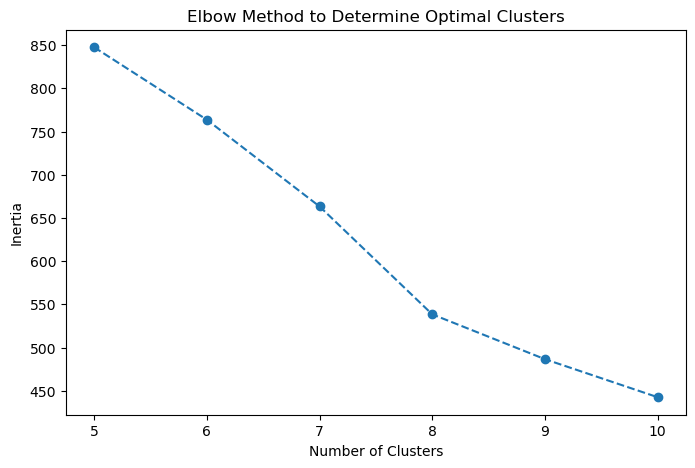

In [72]:
# 7. Elbow Method for Optimal Clusters
inertia = []
k_values = range(5, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

In [73]:
# 8. K-Means Clustering Section
optimal_k = 5  # Adjust based on the elbow method observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_df['Cluster_KMeans'] = kmeans.fit_predict(pca_features)
print(f"K-Means clustering applied with {optimal_k} clusters. Cluster distribution:")
print(final_df['Cluster_KMeans'].value_counts())

K-Means clustering applied with 5 clusters. Cluster distribution:
Cluster_KMeans
3    267
0    238
2    195
4    162
1    138
Name: count, dtype: int64


In [74]:
# Naming Clusters Based on PCA Features
cluster_labels = {
    0: f"High {top_features_pca1.index[0]}, High {top_features_pca2.index[0]}",
    1: f"Low {top_features_pca1.index[0]}, High {top_features_pca2.index[1]}",
    2: f"Moderate {top_features_pca1.index[1]}, Moderate {top_features_pca2.index[0]}",
    3: f"High {top_features_pca1.index[1]}, Low {top_features_pca2.index[1]}",
    4: f"Low {top_features_pca1.index[0]}, Low {top_features_pca2.index[1]}"
}

final_df['Cluster_Label'] = final_df['Cluster_KMeans'].map(cluster_labels)
print("Final Customer Segmentation with PCA-based Labels:")
print(final_df[['Cluster_KMeans', 'Cluster_Label']].head())

Final Customer Segmentation with PCA-based Labels:
   Cluster_KMeans                                      Cluster_Label
0               4  Low Total_Transaction_Amount, Low Sentiment_Score
1               2  Moderate Transaction_Frequency, Moderate Custo...
2               2  Moderate Transaction_Frequency, Moderate Custo...
3               0  High Total_Transaction_Amount, High Customer_L...
4               4  Low Total_Transaction_Amount, Low Sentiment_Score


In [75]:
# 9. Cluster Comparison Section
cluster_summary = final_df.groupby('Cluster_KMeans')[['Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Frequency', 'Customer_Loyalty_Score', 'Sentiment_Score']].mean()
print("Cluster characteristic comparison:")
print(cluster_summary)

Cluster characteristic comparison:
                Total_Transaction_Amount  Average_Transaction_Amount  \
Cluster_KMeans                                                         
0                            8539.330508                 2719.803703   
1                           22618.695652                 2697.971638   
2                            5210.748718                 1718.704615   
3                           13198.893130                 2381.715709   
4                           17270.253086                 3077.571172   

                Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
Cluster_KMeans                                                                  
0                            3.377119                6.422269         0.258613  
1                            8.485507                4.920290         0.496739  
2                            3.056410                4.764103         0.581538  
3                            5.683206                4.